# PCA

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [23]:
# print(cancer['DESCR'])
# cancer

In [24]:
df= pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
# df.shape
# df

# This is before PCA


In [25]:
x = cancer.data
y = cancer.target


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [35]:
from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression()
clf4.fit(x_train,y_train)
pred4 = clf4.predict(x_test)
accuracy_score(y_test,pred4)



0.9385964912280702

# AFTER PCA

In [28]:
scaler = StandardScaler()
scaler.fit(df)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
sc_data = scaler.transform(df)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(sc_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
after_pca = pca.transform(sc_data)

# after_pca


In [31]:
x = after_pca[:,:2]
y = cancer['target']



In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [37]:
from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression()
clf4.fit(x_train,y_train)
pred4 = clf4.predict(x_test)
accuracy_score(y_test,pred4)



0.9385964912280702

Text(0,0.5,'Second Principle component')

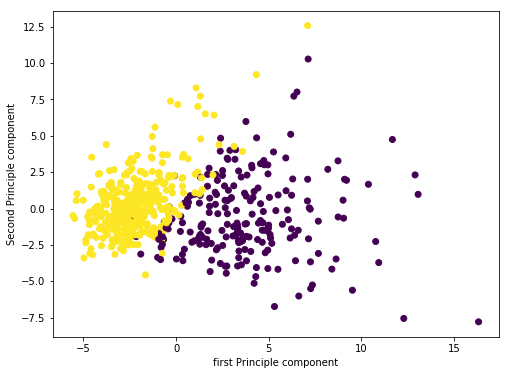

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(after_pca[:,0],after_pca[:,1],c=cancer['target'])
plt.xlabel('first Principle component')
plt.ylabel('Second Principle component')